# Capella API: Search, Order, and View Tutorial

In [1]:
# Required libraries:
# requests
# json
# folium
# rasterio
# from rasterio.plot import show
# from rasterio.windows import Window
# from skimage import exposure
# from matplotlib import pyplot as plt

In [2]:
!pip install folium rasterio 

Your username and password must be saved in a .json file named 'credentials.json' and formatted as follows.

{"username": "yourusername","password": "xxxxxxxxx"}

### Import required libraries, build a print utility function, assign API endpoints and load Credentials

In [4]:
import requests
import json

# JSON utility function
def p(data):
    print(json.dumps(data, indent=2))

# Capella API endpoints
URL = 'https://api.capellaspace.com'
token = '/token'
collections = '/catalog/collections'
catsearch = '/catalog/search'
orders = '/orders/'

# Load username and password
with open('credentials.json') as f:
    data = json.load(f)
    username = data['username']
    password = data['password']

### Get and Print Access Token

In [5]:
# Get token
r = requests.post(URL + token, 
                  headers = {'Content-Type': 'application/x-www-form-urlencoded'}, auth=(username,password))

accesstoken = r.json()["accessToken"]

# print the token
print("Access Token: " + accesstoken)

headers = {'Authorization':'Bearer ' + accesstoken}

Access Token: eyJraWQiOiJCeFdcL0tmZ0QzK3pwVlRBSFZ2NlBnNXRtWjVpOXRYTm8zaDkycFwvT0VONXc9IiwiYWxnIjoiUlMyNTYifQ.eyJzdWIiOiIzYThlODdiZi0wNjUzLTRiMjMtOWQwMy1hYWY5OGY1MTU4NDgiLCJldmVudF9pZCI6IjJkZGVlNWI3LTBhMTItNDcxZS1hMDg2LTAwNmNjZGQwMTU2MSIsInRva2VuX3VzZSI6ImFjY2VzcyIsInNjb3BlIjoiYXdzLmNvZ25pdG8uc2lnbmluLnVzZXIuYWRtaW4iLCJhdXRoX3RpbWUiOjE1OTY1NTI4MjgsImlzcyI6Imh0dHBzOlwvXC9jb2duaXRvLWlkcC51cy13ZXN0LTIuYW1hem9uYXdzLmNvbVwvdXMtd2VzdC0yXzJmNFBGWThoOCIsImV4cCI6MTU5NjU1NjQyOCwiaWF0IjoxNTk2NTUyODI4LCJqdGkiOiJmMmUyMGMxNC1mYTIyLTQ1ODctOWI3OS01ZTNiOTcwYWIxZDUiLCJjbGllbnRfaWQiOiIxMGlxZTdiZmp2a2lhMnBzdG9vNzhqaWo5MSIsInVzZXJuYW1lIjoiZjFkNTQ4NGQtOTNjMy00NGM0LWJhODctYzA4YTFkZjkzNzg3In0.MsPweZxFuT-hE0yb297vNCXhhYKGARgJX9y-7UL_rHA4jCbqRgJ5vhPnSDF-ngsjOrg0n6-uxsVYWtpw04QY13lT120QtAXxpqamI8X4B1VOYMH9-Jjk-0IIr6DpCbpmrAw1voum3aRMQvJad4rZoBFtz4NDLckXc4c5Ko9izGut-A4o8Sa3eM4QunM_csZtr-ZzSu8V_yBoXnrbXOgmDcP1o1N-UCk4znCEe8zDjXuZi8_Q0uMKYLt6qoe1_wnNWSNLaLDN1LGoysRbE3VigEzDk-gamTCmWUIBduRGufEE2WGeImJHHoSsy1Gnpy5SZPL

### Print Available Collections

In [6]:
# See what collections are available
r = requests.get(URL + collections, headers=headers)

# Print results
p(r.json())

{
  "collections": [
    {
      "id": "capella-geo",
      "title": "Capella Geo",
      "description": "Capella SAR Geo data",
      "keywords": [
        "sar"
      ],
      "stac_version": "0.9.0",
      "stac_extensions": [
        "sar",
        "asset",
        "commons"
      ],
      "extent": {
        "spatial": [
          -180,
          -90,
          180,
          90
        ],
        "temporal": [
          "2020-03-30",
          null
        ]
      },
      "providers": [
        {
          "name": "Capella Space",
          "roles": [
            "producer"
          ],
          "url": "https://www.capellaspace.com"
        },
        {
          "name": "AWS",
          "roles": [
            "host"
          ],
          "url": "http://www.amazonaws.com/"
        },
        {
          "name": "Element 84",
          "roles": [
            "processor"
          ],
          "url": "https://element84.com"
        }
      ],
      "license": "proprietary",
    

### Post Search Filters, Print the Results

In [8]:
# Post search filters
filters = {
  "datetime": "2019-01-01T00:00:00Z/2019-12-31T12:31:12Z", # start date/end date and time in YYYY-MM-DDTHH:MM:SSZ format
  "limit": 50, # overwrite the default pagination limit of 10, adjust as necessary
  "collections": ["capella-aerial"], # specify the desired collection
  "query": {"sar:product_type": {"eq":"GEO"}, # specify the type of product desired
            "sar:instrument_mode": {"eq":"spotlight"}}, # specify the instrument mode desired      
  "sort": [{"field": "dtr:start_datetime","direction": "desc"}],
}
headers = {'Content-Type': 'application/json',
  'Accept': 'application/geo+json', 'Authorization':'Bearer ' + accesstoken}
r = requests.post(URL + catsearch, json=filters, headers=headers)

# Inspect the results
p(r.json())

{
  "type": "FeatureCollection",
  "stac_version": "0.9.0",
  "stac_extensions": [],
  "context": {
    "page": 1,
    "limit": 50,
    "matched": 12,
    "returned": 12,
    "latency": 108,
    "userId": "f1d5484d-93c3-44c4-ba87-c08a1df93787",
    "organizationId": "64405d54-9fa6-474e-85fb-7862a5cc3891"
  },
  "numberMatched": 12,
  "numberReturned": 12,
  "features": [
    {
      "stac_version": "0.9.0",
      "stac_extensions": [
        "sat",
        "view",
        "sar"
      ],
      "id": "CAPELLA_ARL_SP_GEO_VV_20190927234024_20190927234124",
      "type": "Feature",
      "bbox": [
        -121.94798471,
        38.2416324,
        -121.91192997,
        38.27347946
      ],
      "geometry": {
        "type": "Polygon",
        "coordinates": [
          [
            [
              -121.94753004,
              38.27347946
            ],
            [
              -121.94798471,
              38.2419568
            ],
            [
              -121.91240001,
           

### View the Results of the Search

In [9]:
# Display the results on a folium map
import folium

m = folium.Map(location=[37.84, -121.91],zoom_start=9)
folium.GeoJson(
    r.text,
).add_to(m)

m

### Make and Post an Order

In [10]:
# Build the Order
features = r.json()["features"]
granulelist = []

# Loop over all the features from the response and add to an array for an order
for f in features:
    item = {"CollectionId": f["collection"], "GranuleId": f["id"]}
    granulelist.append(item)
    
myorder = {"Items": granulelist}

# Post the order and inspect the result
r = requests.post(URL + orders, json=myorder, headers=headers)
p(r.json())

{
  "userId": "f1d5484d-93c3-44c4-ba87-c08a1df93787",
  "organizationId": "64405d54-9fa6-474e-85fb-7862a5cc3891",
  "orderDate": "2020-08-04T14:55:00.547Z",
  "expirationDate": "2020-08-04T15:55:00.547Z",
  "orderId": "7886f130-d662-11ea-bb87-21c36b043739",
  "orderStatus": "completed",
  "items": [
    {
      "collectionId": "capella-aerial",
      "granuleId": "CAPELLA_ARL_SP_GEO_VV_20190927234024_20190927234124",
      "previouslyOrdered": true,
      "type": "spotlight",
      "collectionDate": "2020-07-30T21:00:23.428Z"
    },
    {
      "collectionId": "capella-aerial",
      "granuleId": "CAPELLA_ARL_SP_GEO_VV_20190927233440_20190927233540",
      "previouslyOrdered": true,
      "type": "spotlight",
      "collectionDate": "2020-07-30T21:00:39.979Z"
    },
    {
      "collectionId": "capella-aerial",
      "granuleId": "CAPELLA_ARL_SP_GEO_VV_20190927230304_20190927230404",
      "previouslyOrdered": true,
      "type": "spotlight",
      "collectionDate": "2020-07-30T21:00:3

### Get the STAC records with the signed URLs using the /download endpoint, Print the Result

In [11]:
myorderid = r.json()["orderId"]
r = requests.get(URL + orders + myorderid + '/download', headers=headers)
p(r.json())

[
  {
    "stacVersion": "0.9.0",
    "stacExtensions": [
      "sat",
      "view",
      "sar"
    ],
    "id": "CAPELLA_ARL_SP_GEO_VV_20190927234024_20190927234124",
    "type": "Feature",
    "bbox": [
      -121.94798471,
      38.2416324,
      -121.91192997,
      38.27347946
    ],
    "geometry": {
      "type": "Polygon",
      "coordinates": [
        [
          [
            -121.94753004,
            38.27347946
          ],
          [
            -121.94798471,
            38.2419568
          ],
          [
            -121.91240001,
            38.2416324
          ],
          [
            -121.91192997,
            38.2731547
          ],
          [
            -121.94753004,
            38.27347946
          ]
        ]
      ]
    },
    "properties": {
      "constellation": "eros",
      "instruments": [
        "capella-radar-arl-1"
      ],
      "sar:frequency_band": "X",
      "sar:observation_direction": "right",
      "sar:polarizations": [
        "VV"


### Visualize the Results

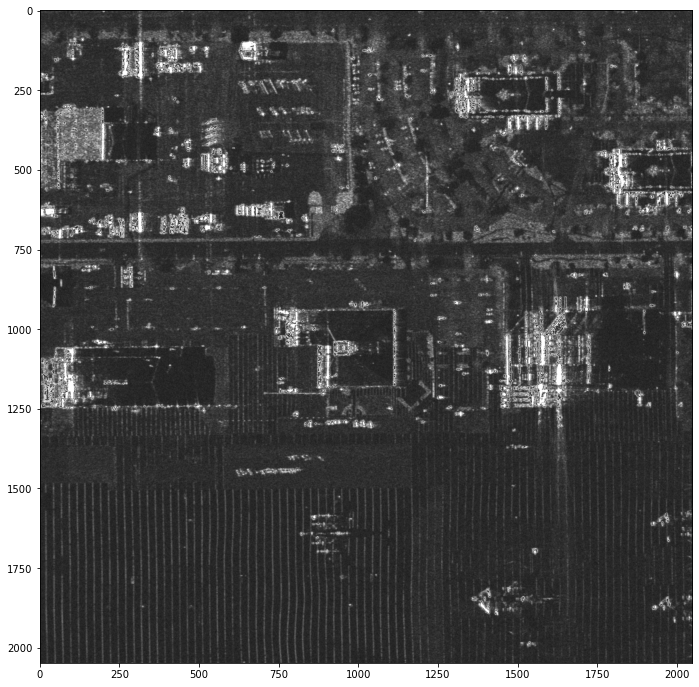

In [14]:
import matplotlib.pyplot as plt

#Open and inspect one of the images
features = r.json()
filepath = features[0]["assets"]["VV"]["href"]
#print(filepath)# print the url to download this asset

# Open the file with Rasterio
import rasterio
from rasterio.plot import show
from rasterio.windows import Window
from skimage import exposure
from matplotlib import pyplot as plt
Session = rasterio.Env()

with Session:
    with rasterio.open(filepath) as src:
        meta = src.meta
        tags = src.tags()
        #print(meta)
        #print(f"{'-' * 100}\n\n")
        w = meta.get("width")
        h = meta.get("height")
        w = Window(w/6, h/6, 2048, 2048)
        data = src.read(1, window=w)
        data[data == meta['nodata']] = 0
        equ = exposure.adjust_log(data, gain=2)
        fig, ax = plt.subplots(1, 1, figsize=(12,12))
        show(equ, cmap='gray')


              
    

